In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

portfolio = [
    {
        "stock_name": "Tesla",
        "ticker_symbol": "TSLA",
        "stocks_owned": 0.095238,
        "average_cost": 210,
        "as_of_date": "2024-04-10"
    },
    {
        "stock_name": "Alphabet Class A",
        "ticker_symbol": "GOOGL",
        "stocks_owned": 1.136565,
        "average_cost": 131.98,
        "as_of_date": "2024-04-10"
    },
    {
        "stock_name": "Apple",
        "ticker_symbol": "AAPL",
        "stocks_owned": 0.116965,
        "average_cost": 170.99,
        "as_of_date": "2024-04-10"
    },
    {
        "stock_name": "PayPal",
        "ticker_symbol": "PYPL",
        "stocks_owned": 5.668852,
        "average_cost": 52.92,
        "as_of_date": "2024-04-10"
    },
    {
        "stock_name": "NetFlix",
        "ticker_symbol": "NFLX",
        "stocks_owned": 0.049588,
        "average_cost": 403.32,
        "as_of_date": "2024-04-10"
    },
    {
        "stock_name": "Amazon",
        "ticker_symbol": "AMZN",
        "stocks_owned": 0.160462,
        "average_cost": 124.64,
        "as_of_date": "2024-04-10"
    },
    {
        "stock_name": "Microsoft",
        "ticker_symbol": "MSFT",
        "stocks_owned": 0.122887,
        "average_cost": 325.50,
        "as_of_date": "2024-04-10"
    },
    {
        "stock_name": "Starbucks",
        "ticker_symbol": "SBUX",
        "stocks_owned": 0.049588,
        "average_cost": 403.32,
        "as_of_date": "2024-04-10"
    },
    {
        "stock_name": "NVIDIA",
        "ticker_symbol": "NVDA",
        "stocks_owned": 0.048499,
        "average_cost": 412.38,
        "as_of_date": "2024-04-10"
    },
    {
        "stock_name": "GM",
        "ticker_symbol": "GM",
        "stocks_owned": 2.272666,
        "average_cost": 29.33,
        "as_of_date": "2024-04-10"
    },
    {
        "stock_name": "CAVA",
        "ticker_symbol": "CAVA",
        "stocks_owned": 2.759214,
        "average_cost": 36.24,
        "as_of_date": "2024-04-10"
    },
    {
        "stock_name": "iShares Semiconductor ETF",
        "ticker_symbol": "SOXX",
        "stocks_owned": 0.814155,
        "average_cost": 185.64,
        "as_of_date": "2024-04-10"
    },
    {
        "stock_name": "Coca-Cola Consolidated",
        "ticker_symbol": "COKE",
        "stocks_owned": 0.033374,
        "average_cost": 816.50,
        "as_of_date": "2024-04-10"
    },
    {
        "stock_name": "Walmart",
        "ticker_symbol": "WMT",
        "stocks_owned": 0.41668,
        "average_cost": 60,
        "as_of_date": "2024-04-10"
    },
    {
        "stock_name": "Coca-Cola",
        "ticker_symbol": "KO",
        "stocks_owned": 1,
        "average_cost": 58.09,
        "as_of_date": "2024-04-17"
    }
]

class StockDataFetcher:
    def __init__(self, portfolio):
        """
        Initializes the class with a portfolio.
        :param portfolio: A list of dictionaries, each containing the ticker symbol of a stock
        """
        self.portfolio = portfolio
    
    def get_historical_data(self, period="10y", interval="1d"):
        historical_data = {}
        for stock in self.portfolio:
            ticker = yf.Ticker(stock['ticker_symbol'])
            data = ticker.history(period=period, interval=interval)
            historical_data[stock['ticker_symbol']] = data
        return historical_data
    
    def fetch_current_market_data(self):
        market_data = {}
        for stock in self.portfolio:
            ticker = yf.Ticker(stock['ticker_symbol'])
            market_data[stock['ticker_symbol']] = ticker.info
        return market_data
    
    def fetch_financials(self):
        financial_data = {}
        for stock in self.portfolio:
            ticker_symbol = stock['ticker_symbol']
            ticker = yf.Ticker(ticker=ticker_symbol)
            financial_data[ticker_symbol] = {
                'annual_financials': ticker.financials,
                'quarterly_financials': ticker.quarterly_financials,
            }
        return financial_data

In [2]:
data_fetcher = StockDataFetcher(portfolio=portfolio)
historical_data = data_fetcher.get_historical_data()
financial_data = data_fetcher.fetch_financials()
market_dict = data_fetcher.fetch_current_market_data()

In [3]:
portfolio_df = pd.DataFrame(portfolio)

In [4]:
portfolio_df.set_index('ticker_symbol', inplace=True)

In [5]:
portfolio_df

,stock_name,stocks_owned,average_cost,as_of_date
ticker_symbol,,,,
TSLA,Tesla,0.095238,210.00,2024-04-10
GOOGL,Alphabet Class A,1.136565,131.98,2024-04-10
AAPL,Apple,0.116965,170.99,2024-04-10
PYPL,PayPal,5.668852,52.92,2024-04-10
NFLX,NetFlix,0.049588,403.32,2024-04-10
AMZN,Amazon,0.160462,124.64,2024-04-10
MSFT,Microsoft,0.122887,325.50,2024-04-10
SBUX,Starbucks,0.049588,403.32,2024-04-10
NVDA,NVIDIA,0.048499,412.38,2024-04-10


In [6]:
class FeatureEngineering:
    def __init__(self, market_dict, historical_data, financial_data):
        self.market_dict = market_dict
        self.historical_data = historical_data
        self.financial_data = financial_data
        self.info_fields = {
            'marketCap', 'trailingPE', 'forwardPE', 'priceToSalesTrailing12Months',
            'bookValue', 'pegRatio', 'dividendYield', 'debtToEquity', 'returnOnEquity',
            'beta', 'currentRatio', 'quickRatio', 'freeCashflow', 'operatingMargins', 
            'ebitdaMargins', 'grossMargins', 'payoutRatio', 'priceToBook', 'enterpriseToRevenue',
            'enterpriseToEbitda', 'earningsQuarterlyGrowth', 'revenueGrowth', 'currentPrice',
            'returnOnAssets', 'operatingCashflow', 'dividendYield', 'volume'
        }
        
    def structure_historical_data(self):
        structured_data = []
        for ticker, df in self.historical_data.items():
            data = df.copy()
            # Assign 'Ticker' to each DataFrame and convert it to a column
            data['Ticker'] = ticker
            # Set 'Date' and 'Ticker' as a multi-level index
            data.set_index(['Ticker'], append=True, inplace=True)
            structured_data.append(data)

        consolidated_history = pd.concat(structured_data, ignore_index=False)
        return consolidated_history
    
    def consolidate_financials(self):
        annual_financials = pd.DataFrame()
        quarterly_fianancials = pd.DataFrame()
        for ticker_symbol, data in self.financial_data.items():
            for report_type in ['annual_financials', 'quarterly_financials']:
                df = data[report_type].copy()
                if not pd.api.types.is_datetime64_any_dtype(df.columns):
                    df = df.transpose()
                df = df.reset_index().melt(id_vars='index', var_name='Date', value_name='Value')
                df.columns = ['Financial_Metric', 'Date', 'Value']
                df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
                df['Ticker'] = ticker_symbol
            if report_type == 'annual_financials':
                annual_financials = pd.concat([annual_financials, df], ignore_index=True)
            elif report_type == 'quarterly_financials':
                quarterly_fianancials = pd.concat([quarterly_fianancials, df], ignore_index=True)
            if not annual_financials.empty:
                annual_financials.set_index('Date', inplace=True)
            if not quarterly_fianancials.empty:
                quarterly_fianancials.set_index('Date', inplace=True)
        return annual_financials, quarterly_fianancials
                
    def consolidate_info_fields(self):
        info_data = []
        for ticker, value in self.market_dict.items():
            info_dict = {field: value.get(field, None) for field in self.info_fields}
            info_dict['Ticker'] = ticker
            info_data.append(info_dict)
        info_dataframe = pd.DataFrame(info_data)
        info_dataframe.set_index('Ticker', inplace=True)
        return info_dataframe
            

In [7]:
feature_engineering = FeatureEngineering(market_dict, historical_data, financial_data)

In [8]:
market_data = feature_engineering.consolidate_info_fields()

In [9]:
class ETFDataFiller:
    def __init__(self, market_data, data_fetcher):
        """
        Initializes the ETFDataFiller with market data and a data fetching class that provides ETF data.
        
        :param market_data: DataFrame containing the market data with tickers as indices.
        :param data_fetcher: An instance of a class that can provide ETF data (e.g., from an API or database).
        """
        self.market_data = market_data
        self.data_fetcher = data_fetcher
        self.mapping = {
            'currentPrice': 'navPrice',
            'beta': 'beta3Year',
            'dividendYield': 'trailingAnnualDividendYield',
            'marketCap': 'totalAssets',
            'returnOnEquity': 'threeYearAverageReturn',
        }
        self.etf_relevant_keys = [
            'trailingAnnualDividendRate', 'trailingAnnualDividendYield', 'lastDividendValue', 'lastDividendDate',
            'yield', 'totalAssets', 'navPrice', 'category', 'ytdReturn', 'beta3Year', 'threeYearAverageReturn'
        ]

    def is_etf(self, ticker):
        """ Determine if the ticker is an ETF by checking if all mapped fields in market_data are NaN. """
        return all(pd.isna(self.market_data.at[ticker, col]) for col in self.mapping)

    def get_etf_data(self, ticker):
        """ Retrieve and filter data for a specific ETF based on relevant keys. """
        etf_data = {}
        full_etf_data = self.data_fetcher.fetch_current_market_data()[ticker] 
        for key in full_etf_data:
            if key in self.etf_relevant_keys:
                etf_data[key] = full_etf_data[key]
        return etf_data

    def fill_data(self, ticker):
        """ Fill NaN values in the market data for a specific ticker using the ETF data provided. """
        if self.is_etf(ticker):
            etf_data = self.get_etf_data(ticker)
            for market_col, etf_col in self.mapping.items():
                if pd.isna(self.market_data.at[ticker, market_col]) and etf_col in etf_data:
                    self.market_data.at[ticker, market_col] = etf_data[etf_col]

    def fill_all_etfs(self):
        """ Identify and fill data for all ETFs in the market_data DataFrame. """
        for ticker in self.market_data.index:
            if self.is_etf(ticker):
                self.fill_data(ticker)

    def display_data(self):
        """ Utility method to display the DataFrame. """
        print(self.market_data)

In [10]:
etf_filler = ETFDataFiller(market_data, data_fetcher)

In [11]:
etf_filler.fill_all_etfs()

In [12]:
market_data

,grossMargins,dividendYield,trailingPE,freeCashflow,enterpriseToEbitda,beta,payoutRatio,enterpriseToRevenue,marketCap,ebitdaMargins,...,priceToSalesTrailing12Months,revenueGrowth,volume,quickRatio,returnOnAssets,earningsQuarterlyGrowth,priceToBook,pegRatio,currentPrice,debtToEquity
Ticker,,,,,,,,,,,,,,,,,,,,,
TSLA,0.18249,NaN,34.867440,2.230375e+09,33.851,2.441,NaN,4.743,4.774956e+11,0.14010,...,4.934182,0.035,93980413,1.141,0.05882,1.150,7.624205,4.30,149.9300,15.050
GOOGL,0.56937,NaN,26.898273,5.865775e+10,18.554,1.054,NaN,6.046,1.948003e+12,0.32587,...,6.337154,0.135,19423439,1.942,0.14366,0.518,6.859693,1.18,156.0100,10.540
AAPL,0.45027,0.005700,25.978228,8.656313e+10,20.094,1.276,0.1477,6.778,2.579415e+12,0.33733,...,6.687516,0.021,41519330,0.920,0.21181,0.131,34.850822,2.63,167.0400,145.803
PYPL,0.39586,NaN,16.171875,5.118500e+09,11.816,1.444,NaN,2.161,6.536894e+10,0.18290,...,2.195725,0.087,9185818,0.314,0.03774,0.522,3.162398,0.84,62.1000,56.263
NFLX,0.43065,NaN,50.753117,1.993877e+10,32.918,NaN,NaN,7.752,2.642259e+11,0.23549,...,7.563958,0.148,6645670,0.758,0.10009,0.787,12.347767,1.54,610.5600,65.601
AMZN,0.46982,NaN,61.800000,4.547575e+10,22.644,1.160,NaN,3.369,1.864372e+12,0.14878,...,3.243599,0.139,30128186,0.807,0.04651,37.216,9.217713,1.62,179.2200,80.037
MSFT,0.69815,0.007400,36.486460,5.868100e+10,25.622,0.877,0.2523,13.333,3.003904e+12,0.52037,...,13.199158,0.176,20568699,1.096,0.15190,0.332,12.609794,2.45,404.2700,46.736
SBUX,0.27869,0.026200,23.302140,3.493350e+09,16.530,0.971,0.5775,3.265,9.867298e+10,0.19753,...,2.689590,0.082,11367990,0.484,0.12524,0.198,NaN,1.55,87.1500,NaN
NVDA,0.72718,0.000200,70.913740,1.986688e+10,60.958,1.744,0.0134,34.501,2.116775e+12,0.56597,...,34.745660,2.653,44536142,3.385,0.38551,7.688,48.544323,1.02,846.7100,25.725


In [13]:
def find_nearest_date(target_date, index, tolerance_days=5):
    # Ensure the target_date is localized to New York timezone
    if target_date.tzinfo is None or target_date.tzinfo.utcoffset(target_date) is None:
        target_date = pd.Timestamp(target_date).tz_localize('America/New_York')
    else:
        target_date = target_date.tz_convert('America/New_York')
    
    # Generate a date range for the target date with a specified tolerance
    date_range = pd.date_range(
        start=target_date - pd.DateOffset(days=tolerance_days), 
        end=target_date + pd.DateOffset(days=tolerance_days),
        tz='America/New_York'  # Ensure the date range is in the New York timezone
    )

    # Convert the index to New York timezone if it isn't already
    if index.tz is None:
        index = index.tz_localize('America/New_York')
    elif index.tz.zone != 'America/New_York':
        index = index.tz_convert('America/New_York')

    # Find intersection of the provided index with the generated date range
    valid_dates = index.intersection(date_range)
    if not valid_dates.empty:
        # Find the nearest date by calculating minimum absolute difference
        nearest_date = valid_dates[np.abs(valid_dates - target_date).argmin()]
        return nearest_date
    
    return np.nan

In [14]:
class StrategyDevelopment:
    def __init__(
        self, portfolio_data, market_data, historical_data
    ):
        self.historical_data = historical_data
        self.portfolio_data = pd.DataFrame(portfolio_data)
        self.portfolio_data.set_index('ticker_symbol', inplace=True)
        self.market_data = market_data
        self.metrics = {
            'marketCap': 'high', 'trailingPE': 'low', 'forwardPE': 'low',
            'priceToSalesTrailing12Months': 'low', 'bookValue': 'high',
            'pegRatio': 'low', 'dividendYield': 'high', 'debtToEquity': 'low',
            'returnOnEquity': 'high', 'momentum': 'high', 'portfolioDiversity': 'high',
            'beta': 'low', 'currentRatio':'high', 'quickRatio': 'high', 
            'freeCashflow':'high', 'operatingMargins': 'high', 'ebitdaMargins': 'high',
            'grossMargins': 'high', 'payoutRatio': 'low', 'priceToBook': 'low', 
            'enterpriseToRevenue': 'low', 'enterpriseToEbitda': 'low', 
            'earningsQuarterlyGrowth': 'high', 'revenueGrowth': 'high', 
            'returnOnAssets': 'high', 'operatingCashflow': 'high', 'dividendYield': 'high',
            'averageVolume': 'high', 'volumeChange': 'high'
        }
        self.initialize_weights()

    def initialize_weights(self):
        self.weights = {ticker: 1.0 / len(self.market_data) for ticker in self.market_data.index}
    
    def normalize_metric(self, series, direction):
        min_val = series.min()
        max_val = series.max()
        if direction == 'high':
            return (series - min_val) / (max_val - min_val)
        return 1 - (series - min_val) / (max_val - min_val)
    
    def normalize_scores(self, dataframe, columns):
        for col in columns:
            min_val = dataframe[col].min()
            max_val = dataframe[col].max()
            dataframe[col] = (dataframe[col] - min_val) / (max_val - min_val)
    
    def calculate_portfolio_diversity(self):

        if self.market_data.index.name != 'Ticker':
            self.market_data.set_index('Ticker', inplace=True)

        # Merge 'portfolio_data' with 'market_data' directly on their indices
        self.portfolio_data = self.portfolio_data.merge(
            self.market_data[['currentPrice']],
            left_index=True,
            right_index=True,
            how='left'
        )

        # Calculate total cost and current market value per stock
        self.portfolio_data['total_cost'] = self.portfolio_data['stocks_owned'] * self.portfolio_data['average_cost']
        total_portfolio_value = self.portfolio_data['total_cost'].sum()
        self.portfolio_data['dollar_value'] = self.portfolio_data['stocks_owned'] * self.portfolio_data['currentPrice']

        # Calculate a discount score where larger scores are incentivised
        self.portfolio_data['discount_score'] = (self.portfolio_data['average_cost'] - self.portfolio_data['currentPrice']) / self.portfolio_data['average_cost']

        # Balance score based on the inverse of the proportion of total portfolio value
        self.portfolio_data['balance_score'] = 1 / (self.portfolio_data['dollar_value'] / total_portfolio_value)

        # Normalize scores to range between 0 and 1
        self.normalize_scores(self.portfolio_data, ['discount_score', 'balance_score'])

        # Calculate 'portfolioDiversity' as a weighted sum of 'discount_score' and 'balance_score'
        self.portfolio_data['portfolioDiversity'] = 0.7 * self.portfolio_data['discount_score'] + 0.3 * self.portfolio_data['balance_score']

        # Merge the portfolio diversity back into the market data
        self.market_data = self.market_data.merge(
            self.portfolio_data[['portfolioDiversity']],
            left_index=True,
            right_index=True,
            how='left'
        )

    def calculate_momentum(self):
        latest_date = pd.Timestamp('today').floor('D') - pd.DateOffset(days=1)
        end_date = latest_date - pd.DateOffset(days=21)
        start_date = end_date - pd.DateOffset(days=230)

        percent_changes = {}

        for ticker, data in self.historical_data.items():
            data = data.sort_index()
            # Find the nearest valid start and end dates
            valid_start_date = find_nearest_date(start_date, data.index)
            valid_end_date = find_nearest_date(end_date, data.index)
            # Calculate percent change if both dates are found
            if pd.notna(valid_start_date) and pd.notna(valid_end_date) and valid_end_date > valid_start_date:
                start_close = data.loc[valid_start_date, 'Close']
                end_close = data.loc[valid_end_date, 'Close']
                percent_change = (end_close - start_close) / start_close
                
            else:
                percent_change = np.nan

            percent_changes[ticker] = percent_change         
            
            # Map the percent change (momentum) to the market_data DataFrame
            if ticker in self.market_data.index:
                self.market_data.loc[ticker, 'momentum'] = percent_change

        # Normalize the momentum scores directly within market_data
        self.normalize_scores(self.market_data, ['momentum'])
        
    def calculate_all_metrics(self):
        # Calculate and normalize all metrics including volume metrics
        for ticker, data in self.historical_data.items():
            if 'Volume' in data.columns:
                data['averageVolume'] = data['Volume'].rolling(window=50).mean()
                data['relativeVolume'] = data['Volume'] / data['averageVolume']
                data['volumeChange'] = data['Volume'].pct_change()
            
            # Update market data
            for metric in ['averageVolume', 'relativeVolume', 'volumeChange']:
                    self.market_data.at[ticker, metric] = data[metric].dropna().iloc[-1] \
                    if not data[metric].dropna().empty else np.nan
        # Normalize each metric according to its specified direction
        for metric, direction in self.metrics.items():
            if metric in self.market_data.columns:
                self.market_data[metric] = self.normalize_metric(self.market_data[metric], direction)

        # Calculate fundamental score as the mean of all metrics
        self.market_data['fundamental_score'] = self.market_data[list(self.metrics.keys())].mean(axis=1)
        
    def apply_strategy(self):
        
        self.calculate_portfolio_diversity()
        self.calculate_momentum()
        self.calculate_all_metrics()

        # Normalize the fundamental scores for proportional adjustment
        max_score = self.market_data['fundamental_score'].max()
        min_score = self.market_data['fundamental_score'].min()
        normalized_scores = (self.market_data['fundamental_score'] - min_score) / (max_score - min_score)
        
        # Adjust initial weights based on normalized fundamental scores
        self.weights = {
            ticker: (self.weights[ticker] * normalized_scores.loc[ticker])
            for ticker in self.market_data.index
        }
        # Normalize weights to ensure they sum to 1
        total_weight = sum(self.weights.values())
        self.weights = {ticker: weight / total_weight for ticker, weight in self.weights.items()}                     

In [15]:
class TechnicalAnalysis:
    def __init__(self, historical_data, max_years=3):
        self.historical_data = historical_data
        self.limit_data_to_recent_years(max_years)
        self.windows = self.calculate_volatility_based_window()
        
    def limit_data_to_recent_years(self, years):
        """
        Limits the data to the most recent years
        """
        current_date = pd.to_datetime('today').tz_localize('America/New_York')
        cutoff_date = current_date - pd.DateOffset(years=years)
        limited_data = {}  # Dictionary to store limited data for each ticker
        for ticker, data in self.historical_data.items():
            limited_data[ticker] = data[data.index >= cutoff_date]
        self.historical_data = limited_data 
        
    def calculate_volatility_based_window(self):
        """
        Calculates a dynamic window size based on volatility for each stock in the portfolio
        """
        window_sizes = {}
        for ticker, data in self.historical_data.items():
            recent_volatility = data['Close'].rolling(window=30).std().dropna().iloc[-1]
            overall_volatility = data['Close'].std()
            window_sizes[ticker] = max(10, int(50/2)) if recent_volatility > overall_volatility else 50
        return window_sizes
        
    def calculate_sma(self, ticker, window=None):
        """Calculates the Simple Moving Average percentage change
        """
        if window is None:
            window = self.windows[ticker]
        sma_values = self.historical_data[ticker]['Close'].rolling(window=window).mean()
        sma_pct_change = sma_values.pct_change()
        return sma_pct_change
    
    def calculate_ema(self, ticker, window=None):
        """
        Calculates exponetial moving average
        """
        if window is None:
            window = self.windows[ticker]
        ema_values = self.historical_data[ticker]['Close'].ewm(span=window, adjust=False).mean()
        return ema_values
    
    def calculate_moving_volatility(self, ticker, window=None):
        """Calculate the moving standard deviation over a window
        """
        if window is None:
            window = self.windows[ticker]
        return self.historical_data[ticker]['Close'].rolling(window=window).std()
    
    def calculate_rsi(self, ticker, window=14):
        """Calculate Relative Strenght Index 
        """
        delta = self.historical_data[ticker]['Close'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        rs = gain / loss
        return 100 - (100 / (1 + rs))
    
    def calculate_macd(self, ticker, fast=12, slow=26, signal=9):
        """Calculate Moving Average Convergence Divergence (MACD)
        """
        ema_fast = self.calculate_ema(ticker, window=fast)
        ema_slow = self.calculate_ema(ticker, window=slow)
        macd = ema_fast - ema_slow
        macd_signal = macd.ewm(span=signal, adjust=False).mean()
        return macd, macd_signal
    
    def calculate_bollinger_bands(self, ticker, window=20):
        """Calculate Bollinger Bands
        """
        sma = self.calculate_sma(ticker, window=window)
        std = self.historical_data[ticker]['Close'].rolling(window=window).std()
        upper_band = sma + (std * 2)
        lower_band = sma - (std * 2)
        return upper_band, lower_band
    
    def calculate_obv(self, ticker):
        """
        Calculate On-Balance Volume (OBV)
        """
        close = self.historical_data[ticker]['Close']
        volume = self.historical_data[ticker]['Volume']
        obv = (np.sign(close.diff()) * volume).fillna(0).cumsum()
        obv_prev = obv.shift(1)
        
        return obv, obv_prev
    
    def calculate_recent_trend(self, ticker):
        # Based on short and long term moving averages
        short_term_window = 20
        long_term_window = 90
        # Calculate short and long term moving averages
        short_term_ma = self.historical_data[ticker]['Close'].rolling(window=short_term_window).mean()
        # Exponential moving average for long term
        long_term_ma = self.historical_data[ticker]['Close'].ewm(span=long_term_window, adjust=False).mean()
        # trend signal shows the relationship between short and long term mas
        trend_signal = (short_term_ma > long_term_ma).astype(int) - \
            (short_term_ma < long_term_ma).astype(int)
        trend_description = trend_signal.map({1: 'up', -1: 'down', 0: 'flat'}).fillna('flat')
        return trend_description

In [16]:
class CandlestickPatterns:
    def __init__(self, historical_data) -> None:
        self.data = historical_data
        
    def identify_doji(self, ticker):
        df = self.data[ticker]
        body = np.abs(df['Close'] - df['Open'])
        price_range = df['High'] - df['Low']
        return body <= (price_range * 0.1)

    def identify_hammer(self, ticker):
        df = self.data[ticker]
        body = np.abs(df['Close'] - df['Open'])
        total_range = df['High'] - df['Low']
        lower_shadow = np.minimum(df['Open'], df['Close']) - df['Low']
        upper_shadow = df['High'] - np.maximum(df['Open'], df['Close'])
        return (body <= total_range * 0.3) & \
            (lower_shadow >= 2 * body) & (upper_shadow <= body * 0.3)

    def identify_inverted_hammer(self, ticker):
        df = self.data[ticker]
        body = np.abs(df['Close'] - df['Open'])
        total_range = df['High'] - df['Low']
        lower_shadow = np.minimum(df['Open'], df['Close']) - df['Low']
        upper_shadow = df['High'] - np.maximum(df['Open'], df['Close'])
        return (body <= total_range * 0.3) & \
            (upper_shadow >= 2 * body) & (lower_shadow <= body * 0.3)

    def identify_shooting_star(self, ticker):
        df = self.data[ticker]
        body = np.abs(df['Close'] - df['Open'])
        total_range = df['High'] - df['Low']
        lower_shadow = np.minimum(df['Open'], df['Close']) - df['Low']
        upper_shadow = df['High'] - np.maximum(df['Open'], df['Close'])
        return (body <= total_range * 0.3) & \
            (upper_shadow >= 2 * body) & (lower_shadow <= body * 0.1)

    def identify_spinning_tops(self, ticker):
        df = self.data[ticker]
        body = np.abs(df['Close'] - df['Open'])
        total_range = df['High'] - df['Low']
        upper_shadow = df['High'] - np.maximum(df['Open'], df['Close'])
        lower_shadow = np.minimum(df['Open'], df['Close']) - df['Low']
        return (body <= total_range * 0.1) & (upper_shadow >= body) & (lower_shadow >= body)

    def identify_engulfing(self, ticker):
        df = self.data[ticker]
        current_body = df['Close'] - df['Open']
        previous_body = df['Close'].shift(1) - df['Open'].shift(1)
        return (np.abs(current_body) > np.abs(previous_body)) & \
            (np.sign(current_body) != np.sign(previous_body))

    def identify_harami(self, ticker):
        df = self.data[ticker]
        current_body = df['Close'] - df['Open']
        previous_body = df['Close'].shift(1) - df['Open'].shift(1)
        return (np.abs(current_body) < np.abs(previous_body)) & \
            (np.sign(current_body) != np.sign(previous_body))

    def identify_piercing_line(self, ticker):
        df = self.data[ticker]
        previous_close = df['Close'].shift(1)
        previous_open = df['Open'].shift(1)
        return (df['Open'] < previous_close) & \
            (
                df['Close'] > previous_open + (previous_close - previous_open) / 2
        )

    def identify_dark_cloud_cover(self, ticker):
        df = self.data[ticker]
        previous_close = df['Close'].shift(1)
        previous_open = df['Open'].shift(1)
        return (df['Open'] > previous_close) & \
            (
                df['Close'] < previous_open + (previous_close - previous_open) / 2
        )

    def identify_morning_star(self, ticker):
        df = self.data[ticker]
        first = df['Close'].shift(2) > df['Open'].shift(2)
        second = np.abs(
            df['Close'].shift(1) - df['Open'].shift(1)
        ) <= (
            df['High'].shift(1) - df['Low'].shift(1)
        ) * 0.1
        third = (df['Open'] < df['Close'].shift(1)) & \
            (df['Close'] > df['Open'].shift(2))
        return first & second & third

    def identify_evening_star(self, ticker):
        df = self.data[ticker]
        first = df['Close'].shift(2) < df['Open'].shift(2)
        second = np.abs(
            df['Close'].shift(1) - df['Open'].shift(1)
            ) <= (
                df['High'].shift(1) - df['Low'].shift(1)
        ) * 0.1
        third = (
            df['Open'] > df['Close'].shift(1)
            ) & (
                df['Close'] < df['Open'].shift(2)
        )
        return first & second & third

    def identify_three_white_soldiers(self, ticker):
        df = self.data[ticker]
        first = df['Close'].shift(2) > df['Open'].shift(2)
        second = df['Close'].shift(1) > df['Open'].shift(1)
        third = df['Close'] > df['Open']
        increasing = first & second & third
        higher_closes = (
            df['Close'].shift(2) < df['Close'].shift(1)
            ) & (
                df['Close'].shift(1) < df['Close']
        )
        return increasing & higher_closes

    def identify_three_black_crows(self, ticker):
        df = self.data[ticker]
        first = df['Close'].shift(2) < df['Open'].shift(2)
        second = df['Close'].shift(1) < df['Open'].shift(1)
        third = df['Close'] < df['Open']
        decreasing = first & second & third
        lower_closes = (
            df['Close'].shift(2) > df['Close'].shift(1)
        ) & (
            df['Close'].shift(1) > df['Close']
        )
        return decreasing & lower_closes
    
    def identify_patterns_for_ticker(self, ticker):
        """
        Identifies all patterns for the historical data of a stock
        """
        df = self.data[ticker]
        patterns = pd.DataFrame(index=df.index)
        patterns['Doji'] = self.identify_doji(ticker)
        patterns['Hammer'] = self.identify_hammer(ticker)
        patterns['Inverted Hammer'] = self.identify_inverted_hammer(ticker)
        patterns['Shooting Star'] = self.identify_shooting_star(ticker)
        patterns['Spinning Tops'] = self.identify_spinning_tops(ticker)
        patterns['Engulfing'] = self.identify_engulfing(ticker)
        patterns['Harami'] = self.identify_harami(ticker)
        patterns['Piercing Line'] = self.identify_piercing_line(ticker)
        patterns['Dark Cloud Cover'] = self.identify_dark_cloud_cover(ticker)
        patterns['Morning Star'] = self.identify_morning_star(ticker)
        patterns['Evening Star'] = self.identify_evening_star(ticker)
        patterns['Three White Soldiers'] = self.identify_three_white_soldiers(ticker)
        patterns['Three Black Crows'] = self.identify_three_black_crows(ticker)
        return patterns
        
    def find_patterns(self):
        
        """Applies pattern identification across all tickers and aggregates results."""
        all_patterns = {}
        for ticker in self.data:
            all_patterns[ticker] = self.identify_patterns_for_ticker(ticker)
        return all_patterns

In [17]:
class MarkovModel:
    def __init__(self, data, years=3) -> None:
        self.original_data = data
        self.historical_data = self.limit_data_to_recent_years(data, years)
        self.thresholds = {}
        self.states = {}
        self.transition_matrices = {}
    
    def limit_data_to_recent_years(self, data, years):
        """ Limit data to the most recent years specified. """
        current_date = pd.to_datetime('today').tz_localize('America/New_York')
        cutoff_date = current_date - pd.DateOffset(years=years)
        return data[data.index >= cutoff_date]
        
    def calculate_thresholds(self):
        data = self.historical_data
        price_changes = data['Close'].pct_change().dropna()
        mean_change = price_changes.mean()
        std_dev = price_changes.std()
        
        # Define thresholds for significant and minor changes
        self.thresholds = {
            'significant': mean_change + std_dev,
            'minor': mean_change
        }
        
    def define_states(self):
        self.calculate_thresholds()
        price_changes = self.historical_data['Close'].pct_change().dropna()
        significant = self.thresholds['significant']
        minor = self.thresholds['minor']

        self.states = price_changes.apply(
            lambda change:
                0 if change <= -significant else
                1 if -significant < change <= -minor else
                2 if -minor < change <= minor else
                3)
    
    def markov_chain_transition_matrix(self):
        self.define_states()
        states = self.states
        transition_matrix = pd.crosstab(states.shift(), states, normalize='index')
        self.transition_matrices = transition_matrix
        return self.transition_matrices
    
    def predict_next_state(self):
        transition_matrix = self.markov_chain_transition_matrix()
        current_state = self.states.iloc[-1]
        next_state_probabilities = transition_matrix.loc[current_state]
        next_state = np.random.choice(
            next_state_probabilities.index, p=next_state_probabilities.values
        )
        return next_state



In [18]:
from scipy.signal import argrelextrema

class SupportResistance:
    def __init__(self, historical_data, order=10):
        """
        Initializes the class with historical data.
        :param historical_data: A Dictionary of DataFrames containing 'Close' prices for each ticker.
        :param order: How many points on each side to use for the local extrema calculation.
        """
        self.data = historical_data
        self.order = order
    
    def calculate_supports(self, ticker):
        """
        Identifies support levels using local minima.
        """
        prices = self.data[ticker]['Close']
        local_minima = argrelextrema(prices.values, np.less_equal, order=self.order)[0]
        supports = prices.iloc[local_minima]
        return supports.dropna()

    def calculate_resistances(self, ticker):
        """
        Identifies resistance levels using local maxima.
        """
        prices = self.data[ticker]['Close']
        local_maxima = argrelextrema(prices.values, np.greater_equal, order=self.order)[0]
        resistances = prices.iloc[local_maxima]
        return resistances.dropna()

    def find_levels(self):
        """
        Calculate and return support and resistance levels for each ticker in the historical data.
        """
        supports = {}
        resistances = {}
        for ticker in self.data:
            supports[ticker] = self.calculate_supports(ticker)
            resistances[ticker] = self.calculate_resistances(ticker)
        return supports, resistances

In [19]:
class InvestmentDecisionMaker:
    def __init__(
        self, historical_data, market_data, portfolio_data, budget
    ):
        self.historical_data = historical_data
        self.market_data = market_data
        self.portfolio_data = pd.DataFrame(portfolio_data)
        self.budget = budget
        
        # Initialize analysis and strategy classes
        self.technical_analysis = TechnicalAnalysis(self.historical_data)
        self.strategy_development = StrategyDevelopment(
            self.portfolio_data, self.market_data, self.historical_data
        )
        
        self.candlestick_patterns = CandlestickPatterns(self.historical_data)
        self.support_resistance = SupportResistance(self.historical_data)
        self.strategy_development.apply_strategy()
        self.weights = self.strategy_development.weights
        
    def perform_analysis(self):
        # Loop through each ticker for technical analysis
        for ticker, data in self.historical_data.items():
            # Assuming each method of technical_analysis returns a DataFrame or Series
            self.market_data.loc[ticker, 'sma'] = self.technical_analysis.calculate_sma(ticker).iloc[-1]
            self.market_data.loc[ticker, 'ema'] = self.technical_analysis.calculate_ema(ticker).iloc[-1]
            self.market_data.loc[ticker, 'volatility'] = self.technical_analysis.calculate_moving_volatility(ticker).iloc[-1]
            self.market_data.loc[ticker, 'rsi'] = self.technical_analysis.calculate_rsi(ticker).iloc[-1]
            macd, macd_signal = self.technical_analysis.calculate_macd(ticker)
            self.market_data.loc[ticker, 'macd'] = macd.iloc[-1]
            self.market_data.loc[ticker, 'macd_signal'] = macd_signal.iloc[-1]
            upper_band, lower_band = self.technical_analysis.calculate_bollinger_bands(ticker)
            self.market_data.loc[ticker, 'upper_bollinger'], self.market_data.loc[ticker, 'lower_bollinger'] = upper_band.iloc[-1], lower_band.iloc[-1]
            obv, obv_prev = self.technical_analysis.calculate_obv(ticker)
            self.market_data.loc[ticker, 'obv'], self.market_data.loc[ticker, 'obv_previous'] = obv.iloc[-1], obv_prev.iloc[-1]
            self.market_data.loc[ticker, 'trend'] = self.technical_analysis.calculate_recent_trend(ticker).iloc[-1]

    def integrate_market_analysis_to_present_data(self):
        
        self.market_data['supports'] = None
        self.market_data['resistances'] = None
        self.market_data['markov_state'] = None
        self.market_data['spinning_top_significance'] = False
        
        supports, resistances = self.support_resistance.find_levels()
        
        for ticker, data in self.historical_data.items():
            
            # Assign the latest supports and resistances from the dictionaries
            if ticker in supports:
                self.market_data.at[ticker, 'supports'] = supports[ticker].iloc[-1] if not supports[ticker].empty else None
            if ticker in resistances:
                self.market_data.at[ticker, 'resistances'] = resistances[ticker].iloc[-1] if not resistances[ticker].empty else None

            markov_model = MarkovModel(data)
            self.market_data.at[ticker, 'markov_state'] = markov_model.predict_next_state()
            
            # Find patterns for each ticker
            patterns = self.candlestick_patterns.identify_patterns_for_ticker(ticker)
            recent_pattern = patterns.iloc[-1] 
            
            for pattern_name, result in recent_pattern.items():
                self.market_data.at[ticker, pattern_name] = result

            # Analyze spinning tops with trend for conditional pattern significance
            spinning_top = self.candlestick_patterns.identify_spinning_tops(ticker).iloc[-1]
            trend = self.market_data.at[ticker, 'trend']

            # Integrate spinning top significance
            spinning_top_significance = spinning_top & (
                ((trend == 'up') & (self.historical_data[ticker]['Close'].iloc[-1] < self.historical_data[ticker]['Open'].iloc[-1])) |
                ((trend == 'down') & (self.historical_data[ticker]['Close'].iloc[-1] > self.historical_data[ticker]['Open'].iloc[-1]))
            )

            # Save the computed significance in market_data
            self.market_data.at[ticker, 'spinning_top_significance'] = spinning_top_significance

    def adjust_weights_based_on_analytics(self):
        for ticker, data in self.market_data.iterrows():
            total_adjustment = 0
            
            # logic to calculate distance from support and resistance
            current_price = data['currentPrice']
            support_level = data.get('supports', current_price)
            resistance_level = data.get('resistances', current_price)
            
            # calculate distance factors
            support_distance_factor = current_price - support_level / current_price
            resistance_distance_factor = (resistance_level - current_price) / current_price
            
            adjustment_factors = {
            'rsi': 0.05 if data['rsi'] > 70 else -0.05 if data['rsi'] < 30 else 0,
            'macd': 0.05 if (data['macd'] - data['macd_signal']) > 0 else -0.05,
            'bollinger': 0.05 if data['currentPrice'] > data['upper_bollinger'] else -0.05 if data['currentPrice'] < data['lower_bollinger'] else 0,
            'price_vs_sma': 0.05 if data['currentPrice'] > data['sma'] else -0.05,
            'price_vs_ema': 0.05 if data['currentPrice'] > data['ema'] else -0.05,
            'volatility': -0.05 if data['volatility'] > self.market_data['volatility'].mean() else 0.05,
            'markov': -0.10 if data['markov_state'] in [0, 1] else 0.10 if data['markov_state'] in [2, 3] else 0,
            'support_distance': 0.1 * (1 - max(0, support_distance_factor)) if current_price >= support_level else 0,
            'resistance_distance': -0.1 * (1 - max(0, resistance_distance_factor)) if current_price <= resistance_level else 0
        }
            positive_patterns = [
                'Hammer', 'Inverted Hammer', 'Morning Star', 
                'Three White Soldiers', 'Piercing Line', 'Engulfing', 'Doji'
            ]
            negative_patterns = [
                'Shooting Star', 'Dark Cloud Cover', 'Evening Star', 
                'Three Black Crows', 'Harami'
            ]
            
            # Calculate pattern weights
            pattern_weights = sum(
                [0.03 if data[pattern] else 0 for pattern in positive_patterns]
            ) - sum(
                [0.03 if data[pattern] else 0 for pattern in negative_patterns]
            )
            # Spinning top pattern weight adjustments
            if data.get('spinning_top_significance', False):
                if data['trend'] == 'up':  # Expecting reversal to downtrend
                    total_adjustment -= 0.05  # Negative adjustment
                elif data['trend'] == 'down':  # Expecting reversal to uptrend
                    total_adjustment += 0.05  # Positive adjustment
            # Total adjustment calculation
            total_adjustment = sum(adjustment_factors.values()) + pattern_weights
            self.weights[ticker] *= (1+ total_adjustment)
        # Normalize the weights so ensure that they sum up to 1 
        total_weight = sum(self.weights.values())
        for key in self.weights.keys():
            self.weights[key] /= total_weight
    
    def allocate_budget(self):
        allocations = {
        ticker: round(self.budget * weight, 2) for ticker, weight in self.weights.items()
        }
        # Minimum allocations per stock is $5
        for ticker in allocations:
            if allocations[ticker] < 5:
                allocations[ticker] = 0
                
        # Recalculate the budget after removing under $5 allocations
        remaining_budget = self.budget - sum(allocations.values())
        remaining_weights = {ticker: self.weights[ticker] for ticker in self.weights if allocations[ticker] > 0}
        total_remaining_weights = sum(remaining_weights.values())
        
        # Redistribute the remaining budget
        additional_allocations = {
            ticker: remaining_budget * (weight / total_remaining_weights)
            for ticker, weight in remaining_weights.items()
        }
        
        # Add to existing allocations
        for ticker in additional_allocations:
            allocations[ticker] += additional_allocations[ticker]
            allocations[ticker] = round(allocations[ticker], 2)
        
        total_allocation = sum(allocations.values())
        difference = self.budget - total_allocation

        # Adjust the allocation of the ticker with the highest allocation
        if difference != 0:
            ticker_with_max_allocation = max(allocations, key=allocations.get)
            allocations[ticker_with_max_allocation] += difference
            allocations[ticker_with_max_allocation] = round(allocations[ticker_with_max_allocation], 2)

        return allocations
    
    def execute_investment_strategy(self):
        self.perform_analysis()
        self.integrate_market_analysis_to_present_data()
        self.adjust_weights_based_on_analytics()
        return self.allocate_budget()     

In [39]:
investment_decision_maker = InvestmentDecisionMaker(historical_data, market_data, portfolio, 101.91)

In [40]:
allocations = investment_decision_maker.execute_investment_strategy()

In [41]:
allocations

{'TSLA': 0,
 'GOOGL': 7.7,
 'AAPL': 7.5,
 'PYPL': 0,
 'NFLX': 18.63,
 'AMZN': 0,
 'MSFT': 20.45,
 'SBUX': 0,
 'NVDA': 47.63,
 'GM': 0,
 'CAVA': 0,
 'SOXX': 0,
 'COKE': 0,
 'WMT': 0,
 'KO': 0}

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd


class StockDataVisualizer:
    def __init__(self, historical_data, years=3) -> None:
        self.historical_data = historical_data
        self. limit_data_to_recent_years(years)
        self.candlestick_patterns = CandlestickPatterns(self.historical_data)
        self.support_resistance = SupportResistance(self.historical_data)
    
    def limit_data_to_recent_years(self, years):
            """
            Limits the data to the most recent years
            """
            current_date = pd.Timestamp.now(tz='America/New_York')
            cutoff_date = current_date - pd.DateOffset(years=years)
            self.historical_data = {symbol: data[data.index >= cutoff_date] \
                                    for symbol, data in self.historical_data.items()}
    
    def plot_stock_data(self):
        for symbol, data in self.historical_data.items():
            fig, ax = plt.subplots(figsize=(14, 7))

            # Plot stock closing price
            ax.plot(data.index, data['Close'], label='Close Price', color='blue')

            # Highlight candlestick patterns
            patterns = self.candlestick_patterns.find_patterns().get(symbol, pd.DataFrame())
            for pattern_name, presence_data in patterns.items():
                valid_dates = presence_data.index[presence_data]  # Get dates where the pattern is True
                if not valid_dates.empty:
                    pattern_prices = data.loc[valid_dates, 'Close']
                    ax.scatter(valid_dates, pattern_prices, label=pattern_name, s=100, marker='o')

            # Fetching support and resistance data for the specific symbol
            supports = self.support_resistance.find_levels()[symbol] if symbol in self.support_resistance.find_levels() else pd.Series()
            resistances = self.support_resistance.find_levels()[symbol] if symbol in self.support_resistance.find_levels() else pd.Series()

            # Plot support levels if they exist
            if not supports.empty:
                ax.scatter(supports.index, supports, color='green', s=100, marker='^', label='Support')

            # Plot resistance levels if they exist
            if not resistances.empty:
                ax.scatter(resistances.index, resistances, color='red', s=100, marker='v', label='Resistance')

            # Formatting the plot
            ax.set_title(f'Stock Price ({symbol}) with Candlestick Patterns and Support/Resistance')
            ax.set_xlabel('Date')
            ax.set_ylabel('Price')
            ax.legend()
            ax.grid(True)

            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()


In [24]:
visualizer = StockDataVisualizer(historical_data)

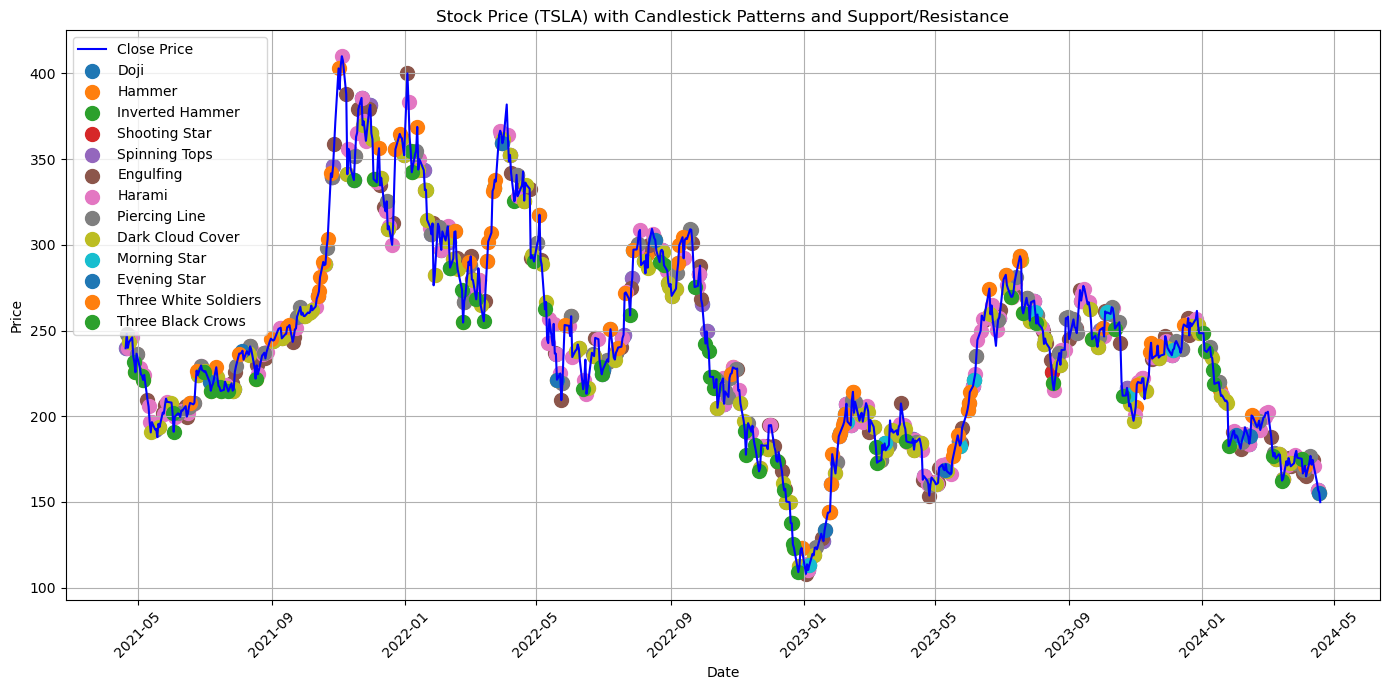

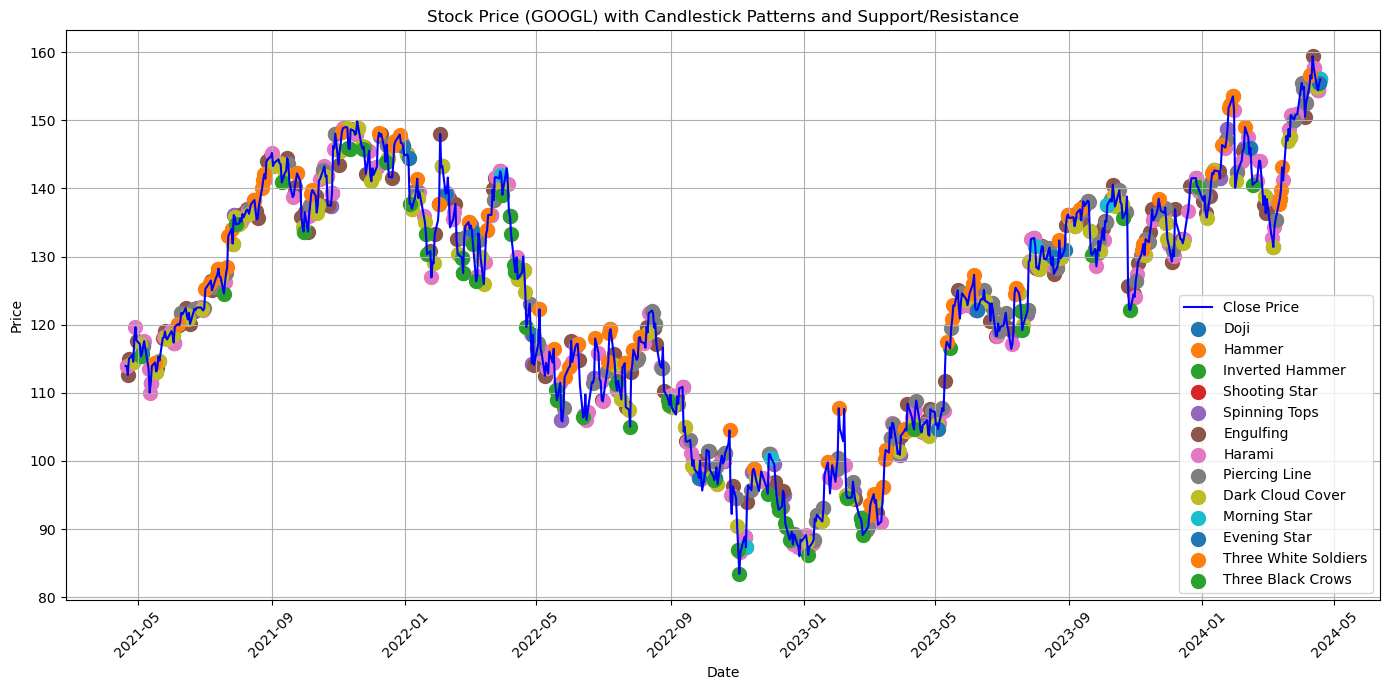

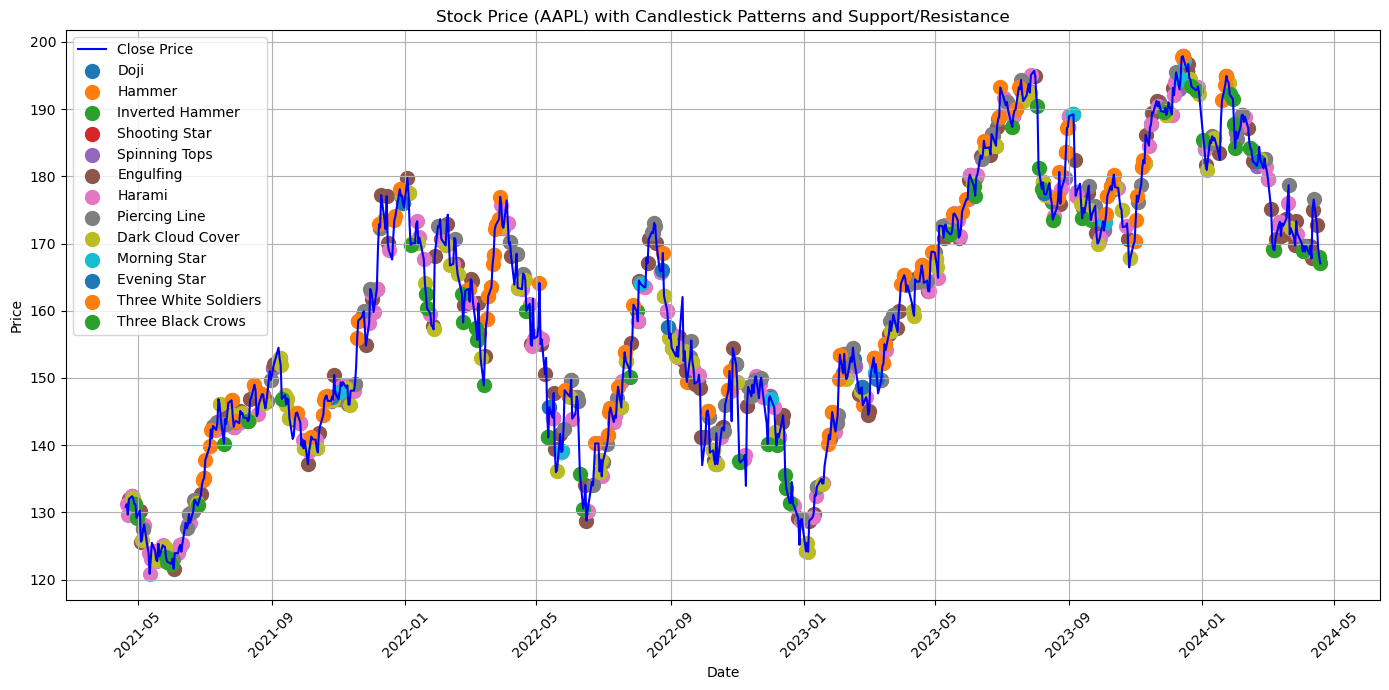

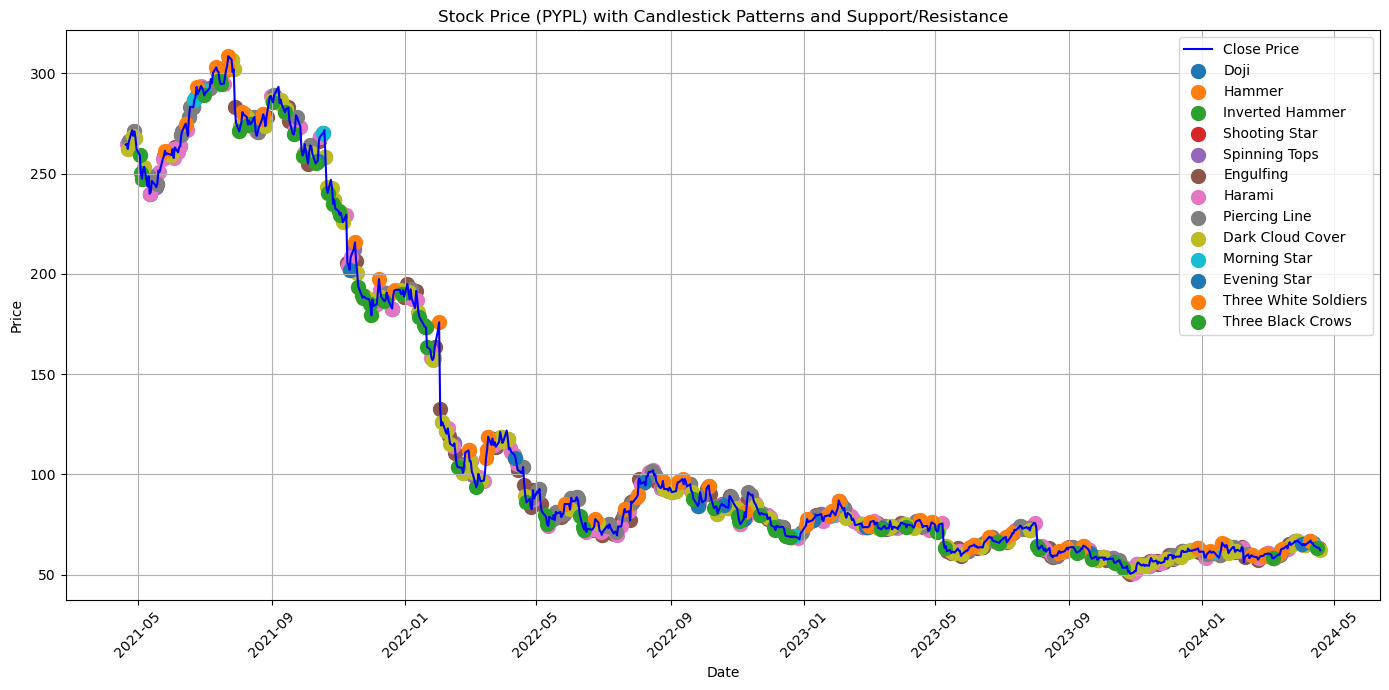

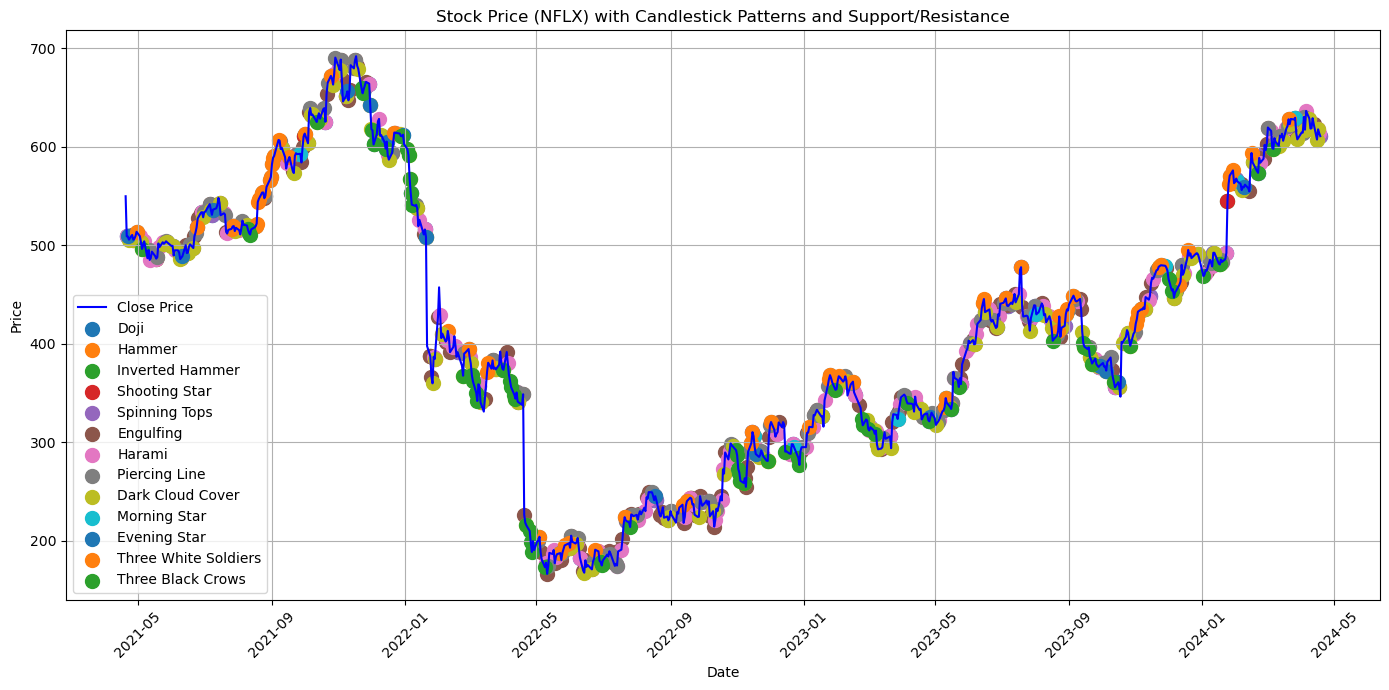

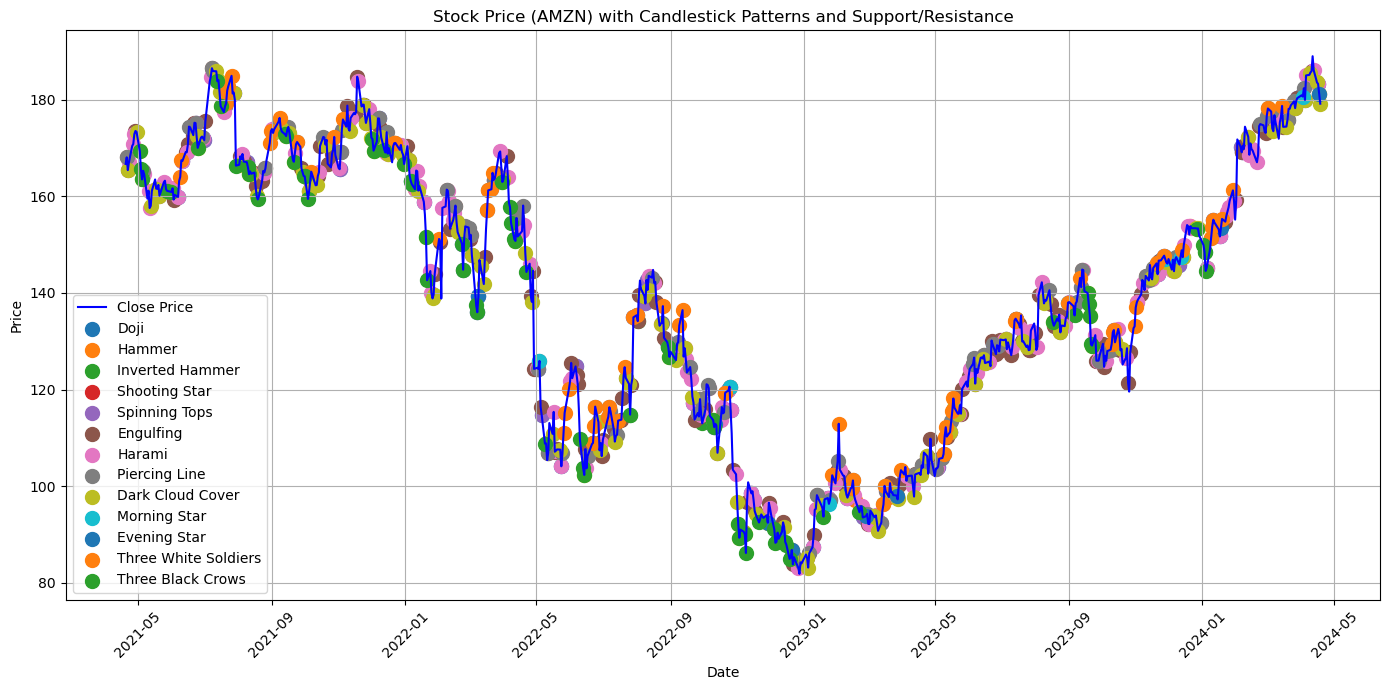

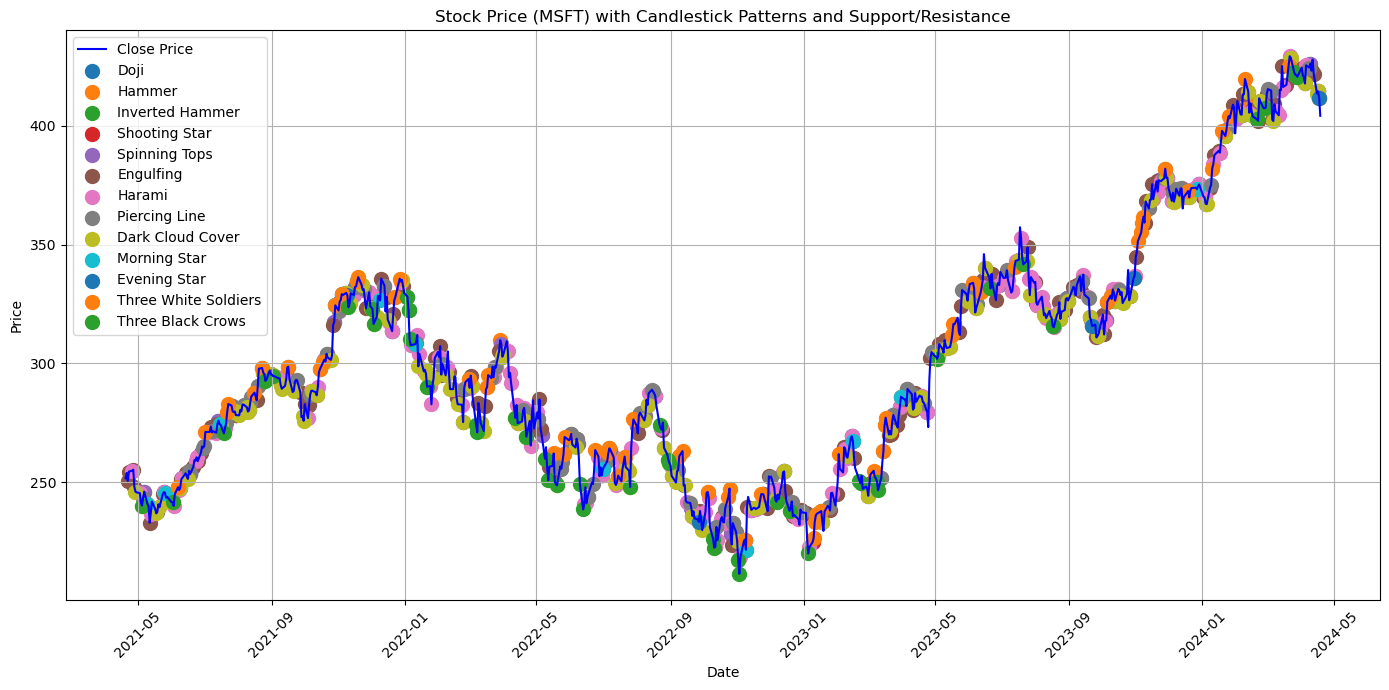

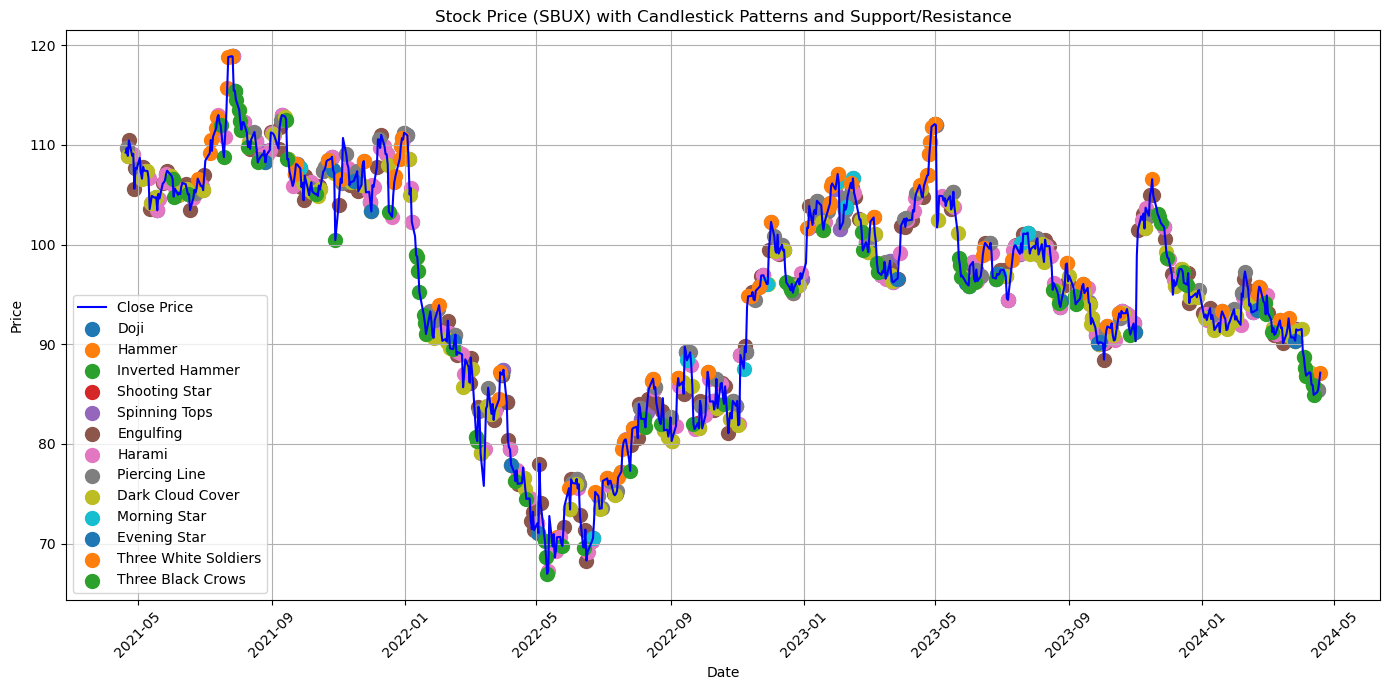

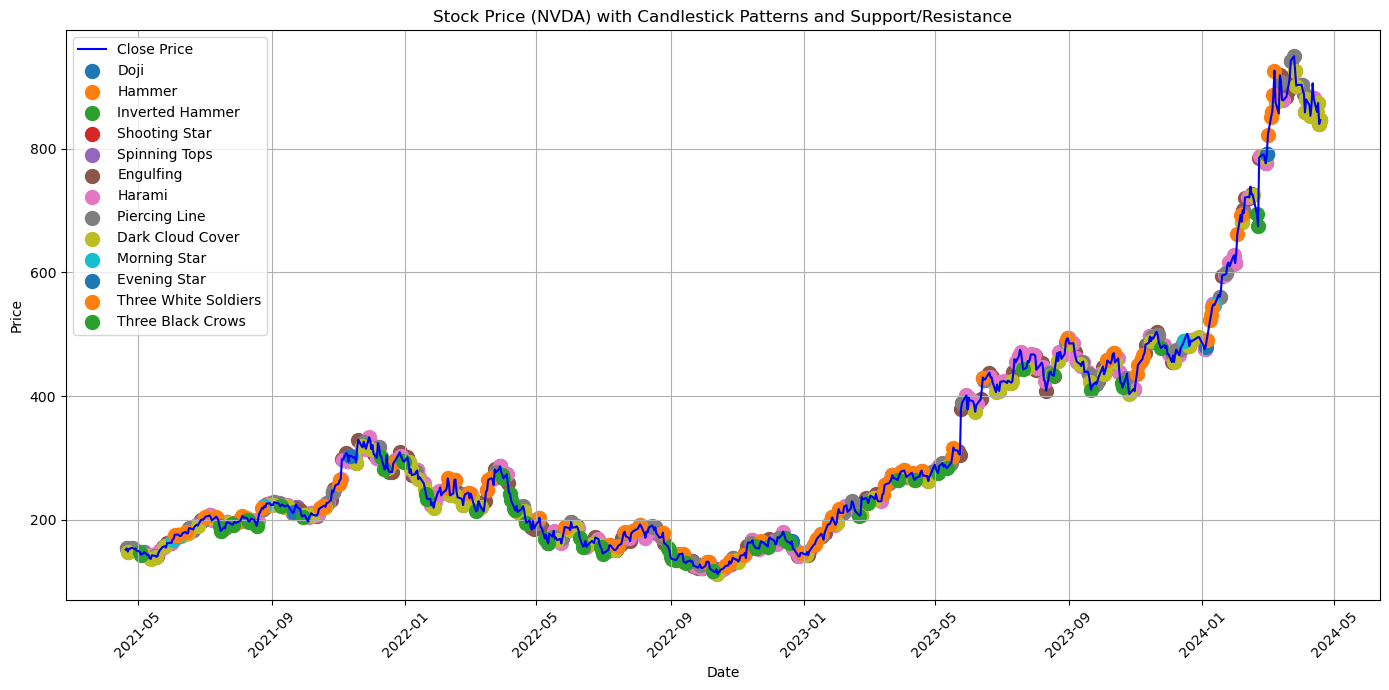

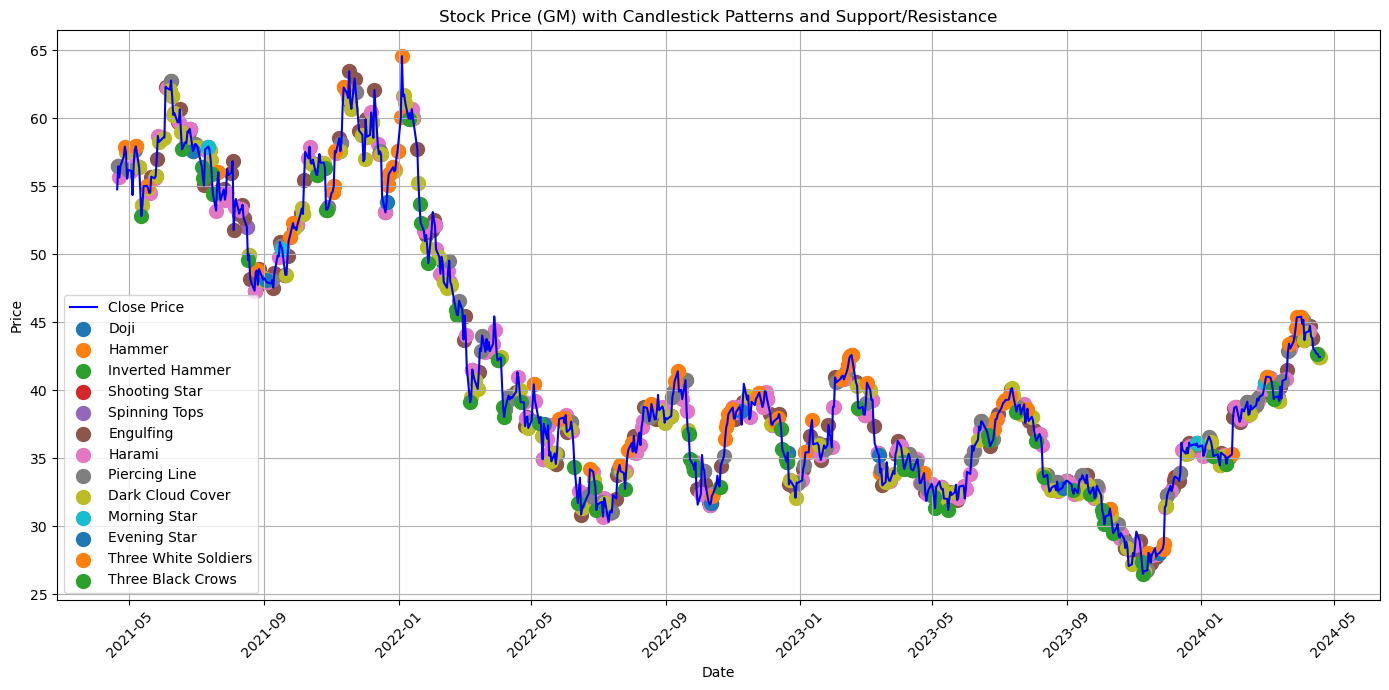

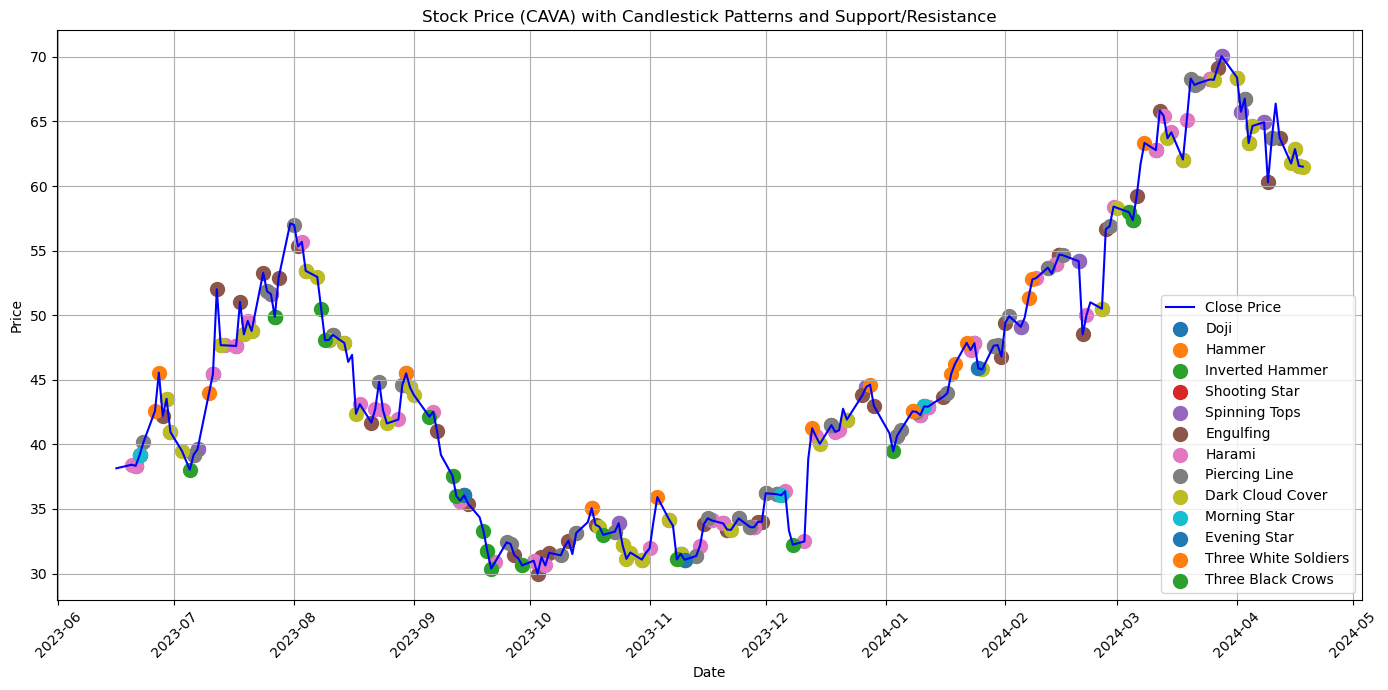

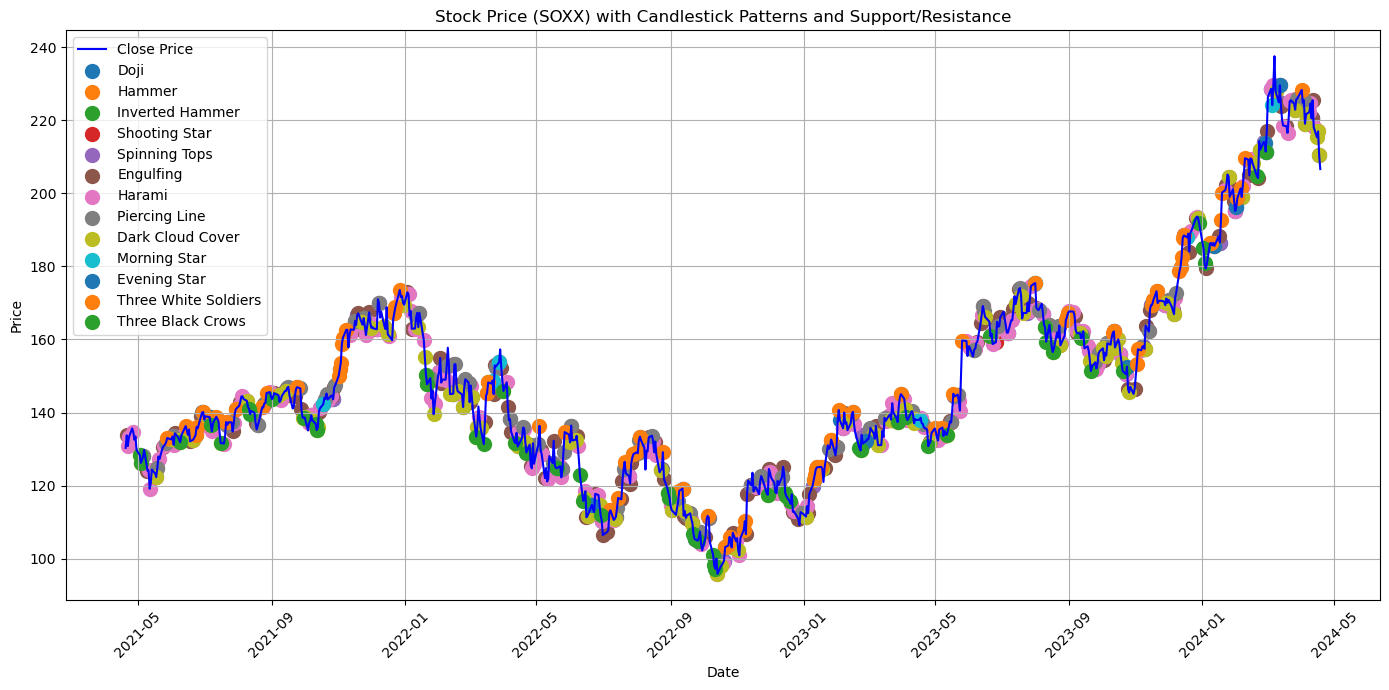

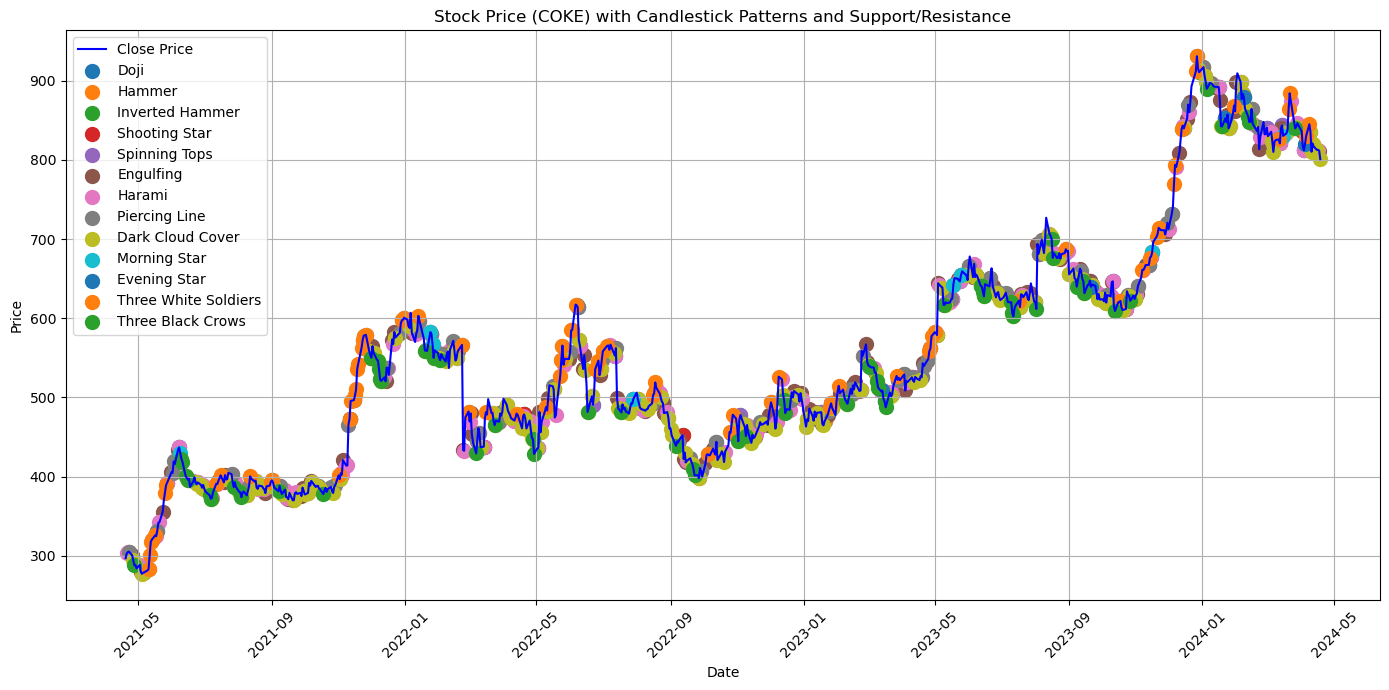

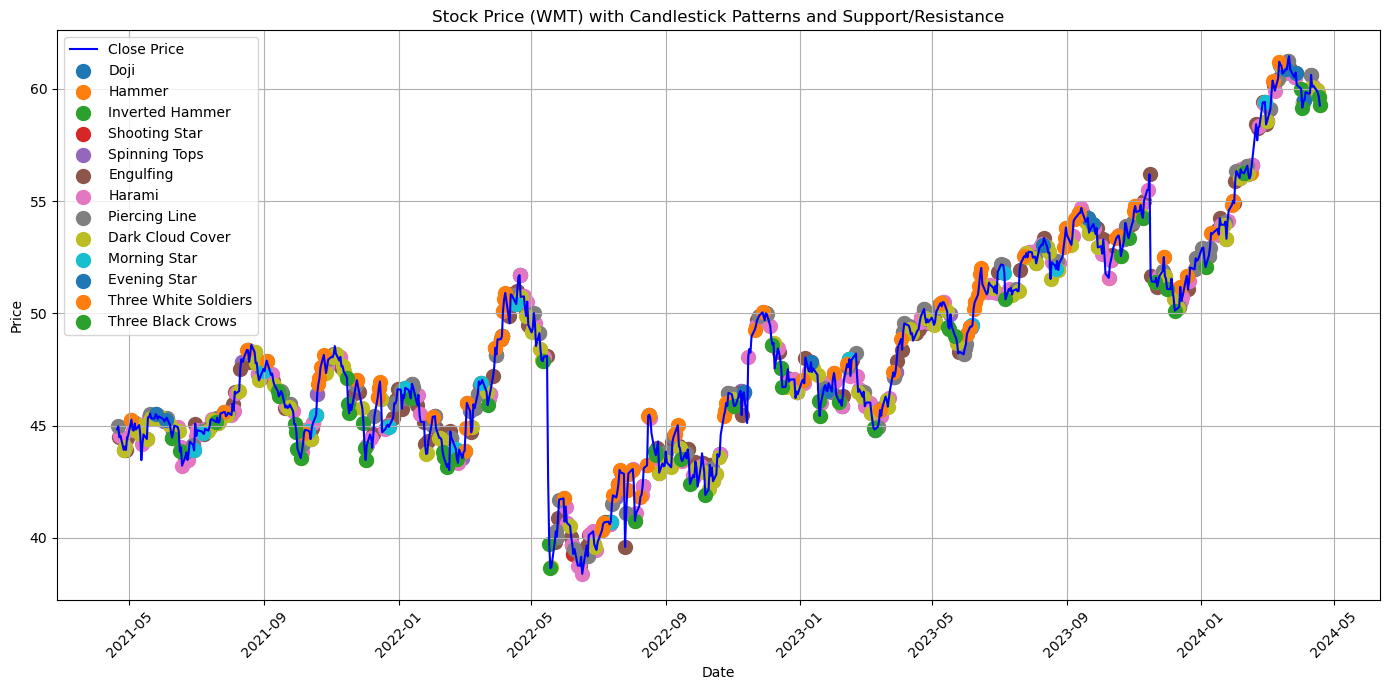

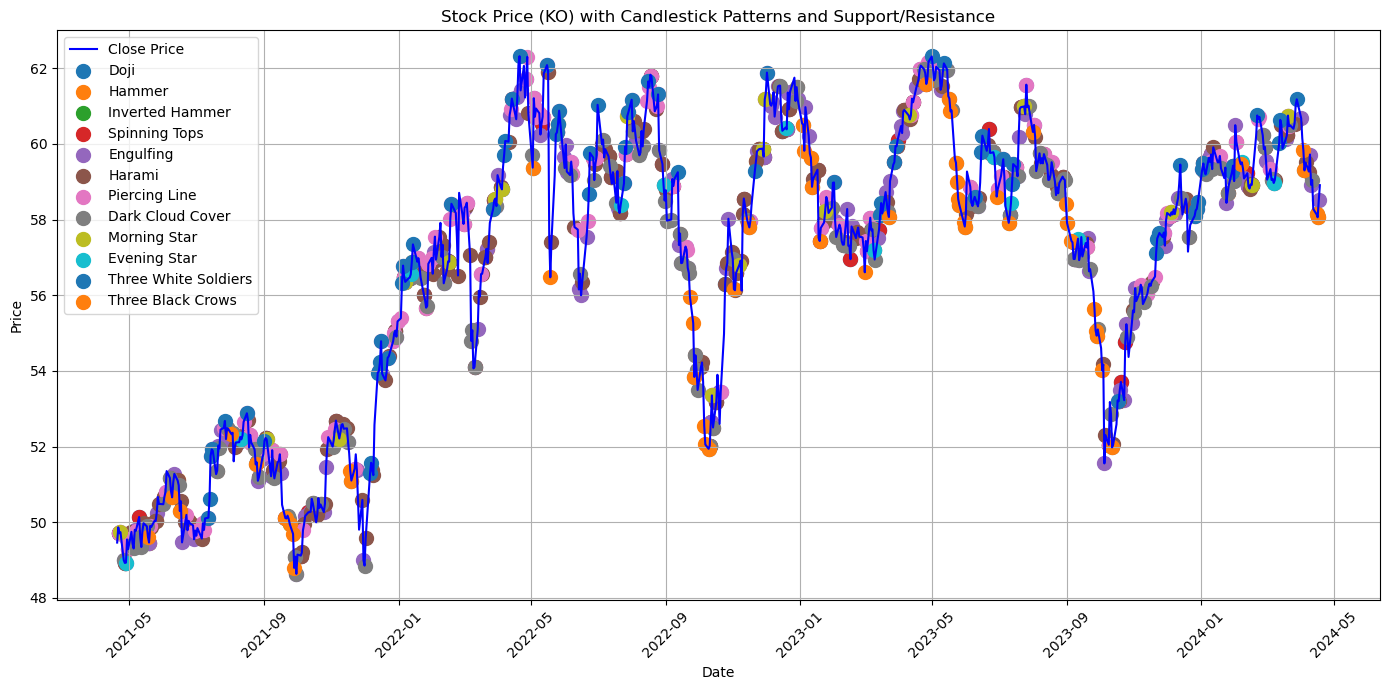

In [25]:
visualizer.plot_stock_data()

In [26]:
market_data

,grossMargins,dividendYield,trailingPE,freeCashflow,enterpriseToEbitda,beta,payoutRatio,enterpriseToRevenue,marketCap,ebitdaMargins,...,Shooting Star,Spinning Tops,Engulfing,Harami,Piercing Line,Dark Cloud Cover,Morning Star,Evening Star,Three White Soldiers,Three Black Crows
Ticker,,,,,,,,,,,,,,,,,,,,,
TSLA,0.18249,NaN,34.867440,2.230375e+09,33.851,2.441,NaN,4.743,4.774956e+11,0.14010,...,False,False,False,False,False,False,False,False,False,False
GOOGL,0.56937,NaN,26.898273,5.865775e+10,18.554,1.054,NaN,6.046,1.948003e+12,0.32587,...,False,False,True,False,True,False,True,False,False,False
AAPL,0.45027,0.005700,25.978228,8.656313e+10,20.094,1.276,0.1477,6.778,2.579415e+12,0.33733,...,False,False,False,False,False,True,False,False,False,True
PYPL,0.39586,NaN,16.171875,5.118500e+09,11.816,1.444,NaN,2.161,6.536894e+10,0.18290,...,False,False,False,False,False,True,False,False,False,False
NFLX,0.43065,NaN,50.753117,1.993877e+10,32.918,NaN,NaN,7.752,2.642259e+11,0.23549,...,False,True,False,False,False,False,False,False,False,False
AMZN,0.46982,NaN,61.800000,4.547575e+10,22.644,1.160,NaN,3.369,1.864372e+12,0.14878,...,False,False,False,False,False,True,False,False,False,False
MSFT,0.69815,0.007400,36.486460,5.868100e+10,25.622,0.877,0.2523,13.333,3.003904e+12,0.52037,...,False,False,False,False,False,False,False,False,False,False
SBUX,0.27869,0.026200,23.302140,3.493350e+09,16.530,0.971,0.5775,3.265,9.867298e+10,0.19753,...,False,False,False,False,False,False,False,False,True,False
NVDA,0.72718,0.000200,70.913740,1.986688e+10,60.958,1.744,0.0134,34.501,2.116775e+12,0.56597,...,False,True,False,False,False,True,False,False,False,False


In [27]:
def identify_missing_fields(market_data):
    missing_dict = {}
    for ticker in market_data.index:
        missing_columns = market_data.loc[ticker][market_data.loc[ticker].isna()].index.tolist()
        if missing_columns:
            missing_dict[ticker] = missing_columns
    return missing_dict

In [28]:
missing_fields_from_market_data = identify_missing_fields(market_data)

In [29]:
missing_fields_from_market_data

{'TSLA': ['dividendYield', 'payoutRatio'],
 'GOOGL': ['dividendYield', 'payoutRatio'],
 'PYPL': ['dividendYield', 'payoutRatio'],
 'NFLX': ['dividendYield', 'beta', 'payoutRatio'],
 'AMZN': ['dividendYield', 'payoutRatio'],
 'SBUX': ['returnOnEquity', 'priceToBook', 'debtToEquity'],
 'CAVA': ['dividendYield',
  'beta',
  'payoutRatio',
  'earningsQuarterlyGrowth',
  'pegRatio'],
 'SOXX': ['grossMargins',
  'freeCashflow',
  'enterpriseToEbitda',
  'payoutRatio',
  'enterpriseToRevenue',
  'ebitdaMargins',
  'currentRatio',
  'bookValue',
  'operatingMargins',
  'operatingCashflow',
  'forwardPE',
  'priceToSalesTrailing12Months',
  'revenueGrowth',
  'quickRatio',
  'returnOnAssets',
  'earningsQuarterlyGrowth',
  'priceToBook',
  'pegRatio',
  'debtToEquity'],
 'COKE': ['pegRatio']}

In [36]:
test = StrategyDevelopment(portfolio, market_data, historical_data)

In [38]:
test.apply_strategy()
test.weights

{'TSLA': 0.0430302521019224,
 'GOOGL': 0.11299771512848698,
 'AAPL': 0.10010791256922445,
 'PYPL': 0.05615775173118194,
 'NFLX': 0.06489342360381227,
 'AMZN': 0.08766344572936621,
 'MSFT': 0.10870911442684146,
 'SBUX': 0.05695518825916285,
 'NVDA': 0.11858374442547867,
 'GM': 0.051449788434035935,
 'CAVA': 0.0,
 'SOXX': 0.02942146748828879,
 'COKE': 0.07380131012996202,
 'WMT': 0.045838849303505264,
 'KO': 0.050390036668730716}